In [1]:
from sklearn import cluster
import pymongo
import json
import matplotlib.pyplot as plt     
import numpy as np                  
import pandas as pd                 
from sklearn import preprocessing
from sklearn.datasets import load_iris
from bson.json_util import dumps
from scipy.sparse import csr_matrix
from sklearn.decomposition import PCA

db_uri = "mongodb://localhost:27017"
client = pymongo.MongoClient(db_uri)
base_db=client.tweets_local
collec_co=base_db.big_tweets_final_with_text


In [2]:
df = pd.DataFrame(list(collec_co.find()))

In [3]:
df.drop('tweets', inplace=True, axis=1)
df.drop('_id', inplace=True, axis=1)
df.drop('verified', inplace=True, axis=1)
df.drop('user_created_at', inplace = True, axis = 1)
#df.drop('verified_badge', inplace = True, axis = 1)
df.drop('groups_count', inplace = True, axis = 1)
df.drop('tweets_count', inplace = True, axis = 1)


def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)
users = df.to_numpy()
    
users_prep=preprocessing.scale(users)

kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(users_prep)

print(kmeans.inertia_)
print(kmeans.cluster_centers_)
print(kmeans.n_clusters)

16264778.998678833
[[-0.01656137 -0.01656137 -0.02130602  0.27432934  0.38413185 -0.05635179
  -0.52165878  0.11627811  0.01372359  0.4685617 ]
 [ 0.02657291  0.02657291  0.03418577 -0.44016469 -0.61634412  0.09041712
   0.83700771 -0.18656962 -0.02201966 -0.75181282]]
2


You should consider upgrading via the 'C:\Users\Alexa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


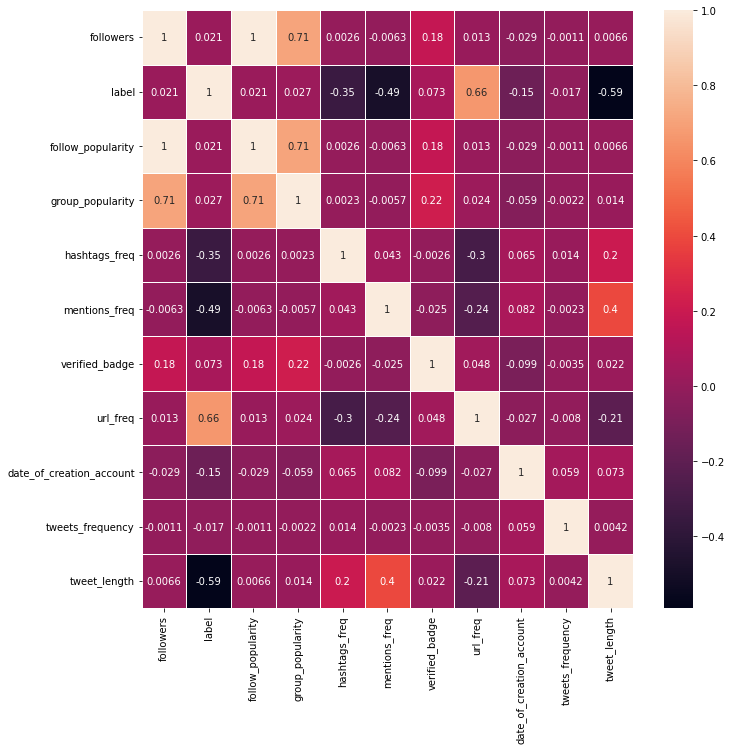

In [8]:

!pip install seaborn
import seaborn as sns
 
# generating correlation heatmap
fig, ax = plt.subplots(figsize=(11,11))         # Sample figsize in inches
sns.heatmap(df.corr(), annot = True, linewidths=.5, ax=ax)
 
# posting correlation heatmap to output console
plt.show()

In [4]:
pca = PCA(2)
pca.fit(users_prep)
 
pca_data = pd.DataFrame(pca.transform(users_prep))

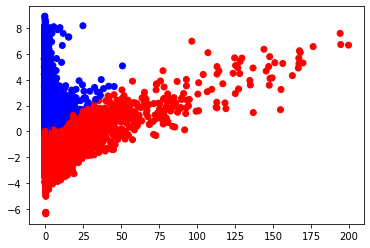

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import math
fig = plt.figure()
ax = fig.add_subplot(111)
new_pca_data = pca_data
cluster_colors = ('blue', 'red')
#We insert label column in new_PCA_data if necessary
if(not 'label' in new_pca_data.columns):
      new_pca_data.insert(2,"label",kmeans.labels_)
      
#We zoom on the graph by selecting only certain scales
new_pca_data = new_pca_data[new_pca_data[0] < 200]
new_pca_data = new_pca_data[new_pca_data[1] < 10]
ax.scatter(new_pca_data[0], new_pca_data[1],
           c = list(map(lambda label : cluster_colors[label],new_pca_data['label'])))

  
''' str_labels = list(map(lambda label:'% s' % label, kmeans.labels_))
  
# list(map(lambda data1, data2, str_label:
#         ax.text(data1, data2, s = str_label, size = 16.5,
#         zorder = 20, color = 'k'), pca_data[0], pca_data[1], str_labels))''' 
  
plt.show()

In [6]:
#1 - Add labels for each individual in the dataframe. 
#2 - Convert this in Json, push to mongoDB 
labels_array = kmeans.labels_
#iterate through dataframe, add each cells of labels_array in a new column "label" : 
new_df = df
if(not 'label' in new_df.columns):
    new_df.insert(1, "label", labels_array, True)

In [7]:
#Display mean values of each class from k_means : 

new_df_0 = new_df[new_df['label'] == 0]
new_df_1 = new_df[new_df['label'] == 1]
new_df_0_size = np.shape(new_df_0)[0]
new_df_1_size = np.shape(new_df_1)[0]

print('mean values for group label = 0, size = ',new_df_0_size,'\n')

print('follow_popularity_new_df_0 = ', np.mean(new_df_0['follow_popularity']))
print('group_popularity_new_df_0 = ', np.mean(new_df_0['group_popularity']))
print('hashtags_freq_new_df_0 = ', np.mean(new_df_0['hashtags_freq']))
print('mentions_freq_new_df_0 = ', np.mean(new_df_0['mentions_freq']))
print('url_freq_new_df_0 = ', np.mean(new_df_0['url_freq']))
print('date_of_creation_account_new_df_0 = ', np.mean(new_df_0['date_of_creation_account']))
print('tweets_frequency_new_df_0 = ', np.mean(new_df_0['tweets_frequency']))
# print('levenshtein_distance_new_df_0 = ', np.mean(new_df_0['levenshtein_distance']))
print('tweet_length_new_df_0 = ', np.mean(new_df_0['tweet_length']))

print('\n\n')
print('*************************************************************************************')
print('\n\n')
print('mean values for group label = 1, size = ',new_df_1_size,'\n')
print('follow_popularity_new_df_1 = ', np.mean(new_df_1['follow_popularity']))
print('group_popularity_new_df_1 = ', np.mean(new_df_1['group_popularity']))
print('hashtags_freq_new_df_1 = ', np.mean(new_df_1['hashtags_freq']))
print('mentions_freq_new_df_1 = ', np.mean(new_df_1['mentions_freq']))
print('url_freq_new_df_1 = ', np.mean(new_df_1['url_freq']))
print('date_of_creation_account_new_df_1 = ', np.mean(new_df_1['date_of_creation_account']))
print('tweets_frequency_new_df_1 = ', np.mean(new_df_1['tweets_frequency']))
# print('levenshtein_distance_new_df_1 = ', np.mean(new_df_1['levenshtein_distance']))
print('tweet_length_new_df_1 = ', np.mean(new_df_1['tweet_length']))

mean values for group label = 0, size =  1136625 

follow_popularity_new_df_0 =  3.842664803351061e-05
group_popularity_new_df_0 =  8.089198325977946e-05
hashtags_freq_new_df_0 =  1.8757633422837732
mentions_freq_new_df_0 =  1.16966679950119
url_freq_new_df_0 =  0.058026373412541396
date_of_creation_account_new_df_0 =  0.6301839625637214
tweets_frequency_new_df_0 =  1.928575550812787e-05
tweet_length_new_df_0 =  123.75160423576068



*************************************************************************************



mean values for group label = 1, size =  706437 

follow_popularity_new_df_1 =  0.00016083997283502873
group_popularity_new_df_1 =  0.00019566296662880007
hashtags_freq_new_df_1 =  0.8642111820490136
mentions_freq_new_df_1 =  0.48518165118038586
url_freq_new_df_1 =  0.6335382415590759
date_of_creation_account_new_df_1 =  0.5576290181204062
tweets_frequency_new_df_1 =  5.269836952739122e-06
tweet_length_new_df_1 =  85.06001925310427
